In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
df1=pd.read_csv('ipl_b_by_b.csv')
df2=pd.read_csv('ipl_match_result.csv')
df1.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True) # i replaced it because these 
#are same teams
df2.replace('Rising Pune Supergiants','Rising Pune Supergiant',inplace=True)

## Powerplay Average Score Needed to win a Match

In [103]:
dfx=df1[['id','over','ball','total_runs','batting_team','bowling_team']]
mask=dfx['over']<=6
dfx=dfx.where(mask).dropna()
dfx2=df2[['id','winner']]
dfx2.set_index('id',inplace=True)
# to find sum of powerplay scores
df_totalruns=dfx.groupby(['id','batting_team']).agg({'total_runs':np.sum})
# combinig two datsets
final_df=pd.merge(df_totalruns,dfx2,how='outer',left_index=True,right_index=True)
# to get only winning team scores in dataframe
final_df.reset_index(inplace=True)
mask=final_df['batting_team']==final_df['winner']
final_df=final_df.where(mask).dropna()
# average score in powerplay of winning teams
average=final_df['total_runs'].sum()/len(final_df)
print('Average Score Needed:       ',format(average,".2f"))



Average Score Needed:        55.63


## Toss to Win Ratio

<ipython-input-104-387e30c84802>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t.dropna(how='any',inplace=True)


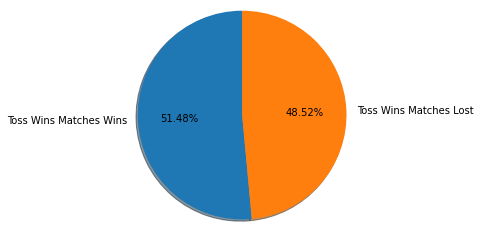

In [104]:
t_win_m_win=0

df_t=df2[['id','toss_winner','winner','team1','team2']]
df_t.dropna(how='any',inplace=True)
for ind in df_t.index:
    if df_t['winner'][ind]==df_t['toss_winner'][ind]:
        t_win_m_win= t_win_m_win+1
t_win_m_loss=len(df_t)-t_win_m_win
pie_chart_values=[t_win_m_win,t_win_m_loss]
pie_chart_Labels=["Toss Wins Matches Wins","Toss Wins Matches Lost"]
plt.axis("equal")
plt.pie(pie_chart_values,labels=pie_chart_Labels,radius=1.2,autopct='%0.2f%%',shadow=True,startangle=90)
plt.show()
#Total_matches
        


## Virat Kohli IPL Career Vs Rohit Sharma IPL Career

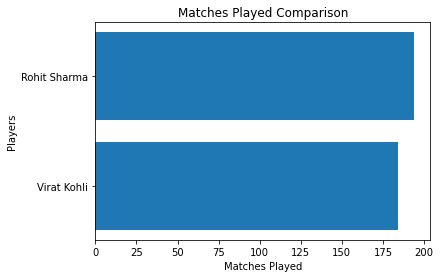

In [105]:
#Rohit Kohli Stats
filt=df1["batsman"]=='V Kohli'
dfq3_1=df1.loc[filt]
K_total_runs=dfq3_1['total_runs'].sum()
df_average_score=dfq3_1.groupby(['id']).agg({'total_runs':np.sum})
K_Average_score=df_average_score['total_runs'].sum()/len(df_average_score)
K_Strike_rate=(df_average_score['total_runs'].sum()/len(dfq3_1))*100
k_total_man_of_the_match=len(df2[df2.player_of_match=='V Kohli'])
K_Matches_Played=len(df_average_score)
# Rohit Sharma Stats
filt=df1["batsman"]=='RG Sharma'
dfq3_1=df1.loc[filt]
R_total_runs=dfq3_1['total_runs'].sum()
df_average_score=dfq3_1.groupby(['id']).agg({'total_runs':np.sum})
R_Average_score=df_average_score['total_runs'].sum()/len(df_average_score)
R_Strike_rate=(df_average_score['total_runs'].sum()/len(dfq3_1))*100
R_total_man_of_the_match=len(df2[df2.player_of_match=='RG Sharma'])
R_Matches_Played=len(df_average_score)
b= [K_Matches_Played,R_Matches_Played]
plt.yticks(ypos1,['Virat Kohli','Rohit Sharma'])
plt.barh(ypos1,b)
plt.xlabel("Matches Played")
plt.ylabel("Players")
plt.title("Matches Played Comparison")
plt.show()


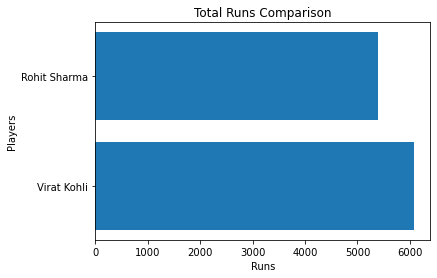

In [106]:
b1= [K_total_runs,R_total_runs]
plt.barh(ypos1,b1)
plt.yticks(ypos1,['Virat Kohli','Rohit Sharma'])
plt.xlabel("Runs")
plt.ylabel("Players")
plt.title("Total Runs Comparison")
plt.show()

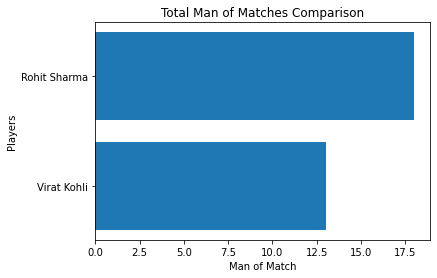

In [107]:
b1= [k_total_man_of_the_match,R_total_man_of_the_match]
plt.barh(ypos1,b1)
plt.yticks(ypos1,['Virat Kohli','Rohit Sharma'])
plt.xlabel("Man of Match")
plt.ylabel("Players")
plt.title("Total Man of Matches Comparison")
plt.show()

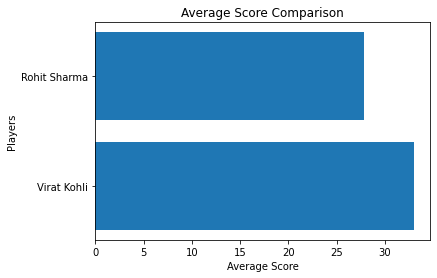

In [108]:
b1= [K_Average_score,R_Average_score]
plt.barh(ypos1,b1)
plt.yticks(ypos1,['Virat Kohli','Rohit Sharma'])
plt.xlabel("Average Score")
plt.ylabel("Players")
plt.title("Average Score Comparison")
plt.show()

## What is percentage of win and loss if  team concede more than 50 runs in first and second innings death overs

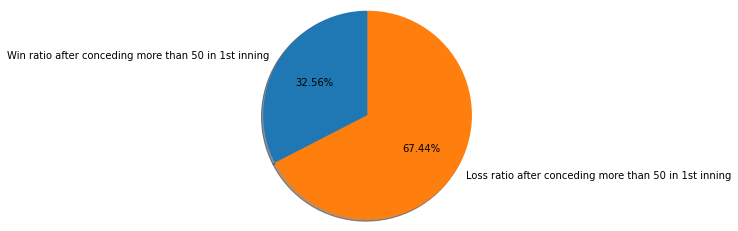

In [109]:
#1st inning
loss_sum=0
dfx1=df1[['id','inning','over','ball','total_runs','bowling_team']]
dfx1 = dfx1[dfx1['bowling_team'].notna()]
filt=dfx1['inning']==1
dfq4_1=dfx1.loc[filt]
filt=dfq4_1['over']>15
dfq4_1=dfq4_1.loc[filt]
df_totalruns1=dfq4_1.groupby(['id','bowling_team']).agg({'total_runs':np.sum})
filt=df_totalruns1['total_runs']>50
df_totalruns1=df_totalruns1.loc[filt]
final_df1=pd.merge(df_totalruns1,dfx2,how='outer',left_index=True,right_index=True)
final_df1.reset_index(inplace=True)
for ind in final_df1.index:
    if final_df1['winner'][ind]!=final_df1['bowling_team'][ind]:
        loss_sum= loss_sum+1
win_sum=len(final_df1)-loss_sum
pie_chart_values=[win_sum,loss_sum]
pie_chart_Labels=["Win ratio after conceding more than 50 in 1st inning","Loss ratio after conceding more than 50 in 1st inning"]
plt.axis("equal")
plt.pie(pie_chart_values,labels=pie_chart_Labels,radius=1.2,autopct='%0.2f%%',shadow=True,startangle=90)
plt.show()


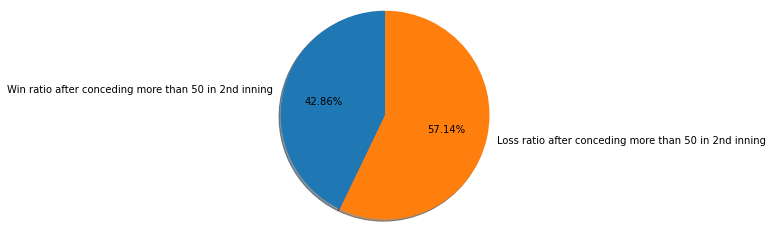

In [110]:
#2nd inning
loss_sum=0
dfx1=df1[['id','inning','over','ball','total_runs','bowling_team']]
dfx1 = dfx1[dfx1['bowling_team'].notna()]
filt=dfx1['inning']==2
dfq4_1=dfx1.loc[filt]
filt=dfq4_1['over']>15
dfq4_1=dfq4_1.loc[filt]
filt=dfq4_1['over']>15
dfq4_1=dfq4_1.loc[filt]
df_totalruns1=dfq4_1.groupby(['id','bowling_team']).agg({'total_runs':np.sum})
filt=df_totalruns1['total_runs']>50
df_totalruns1=df_totalruns1.loc[filt]
final_df1=pd.merge(df_totalruns1,dfx2,how='outer',left_index=True,right_index=True)
final_df1.reset_index(inplace=True)
for ind in final_df1.index:
    if final_df1['winner'][ind]!=final_df1['bowling_team'][ind]:
        loss_sum= loss_sum+1
win_sum=len(final_df1)-loss_sum
pie_chart_values=[win_sum,loss_sum]
pie_chart_Labels=["Win ratio after conceding more than 50 in 2nd inning","Loss ratio after conceding more than 50 in 2nd inning"]
plt.axis("equal")
plt.pie(pie_chart_values,labels=pie_chart_Labels,radius=1.2,autopct='%0.2f%%',shadow=True,startangle=90)
plt.show()

## Machine Learning Part

In [112]:
df = pd.read_csv('ipl_ml.csv')
# --- Data Cleaning ---
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)
# Keeping only consistent teams that are still playing
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])
# Rearranging the columns and moving target at the end
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)



C:\Users\umair\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.24662e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\umair\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.47288e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\umair\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53988e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\umair\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.43813e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\umair\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.60409e-18): result may not be accurate

{'alpha': 40}
-328.4152792487924


C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


MAE: 12.117294527005019
MSE: 251.03172964112724
RMSE: 15.843980864704655


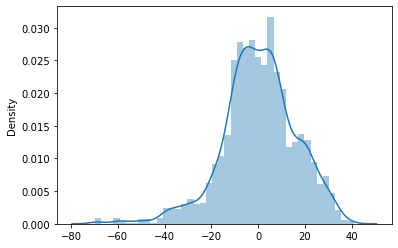

In [113]:
prediction=ridge_regressor.predict(X_test)
import seaborn as sns
sns.distplot(y_test-prediction)
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
